# Task

Given a system:

<!-- A =
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$
\begin{cases}
\dot x =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+
\begin{bmatrix}
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix}
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).



1.   Find its transfer function representation ($y(s) / u(s) = W(s)$).
1.   Propose an ODE representation of the system.
1.   Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.
1.   Show stability of the closed-loop system via eigenvalue analysis.
1.   Find stability margins by analysing Bode diagram for the system.
1.   Simulate closed-loop system.
1.   Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix}
2+0.1n \\
n-5 \\
0 \\
0
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.
1. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dinamics.
1. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).
1. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.
1. Simulate the discrete system. Show graphs.





## Task solution
After substituting $n = 4$ the system will look like:


$$\begin{cases}
\dot x =
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
4 & -2 & -10/4 & -2 \\
-5 & -0.4 & 0 & -3 \\
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ -1 \\ 1
\end{pmatrix} u \\
y = \begin{pmatrix} 1 & 1 & 0 & 0 \end{pmatrix} x
\end{cases}
$$
$A = \begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
4 & -2 & -10/4 & -2 \\
-5 & -0.4 & 0 & -3 \\
\end{pmatrix}$

$B = \begin{pmatrix} 0 \\ 0 \\ -1 \\ 1
\end{pmatrix}$

$C = \begin{pmatrix} 1 & 1 & 0 & 0 \end{pmatrix}$


## Task 1:

First of all let's solve the transfer function problem for general matrices $A, B, C$, functions $u(t)$. We have the following:
\begin{gather*}
\dot x  = A \cdot x + B \cdot u  \\
y = C \cdot x
\end{gather*}
we consider only the first equation. We apply ***Laplace Transform*** to both sides.

$$s X(s) = A \cdot X(s) + B \cdot X(s) \iff \big( s \cdot I - A \big ) \cdot U(s) = B \cdot U(s)$$
under the assumption that the matrix $s \cdot I - A$ is indeed revertible, we proceed as follows:

$$X(s) = \big( s \cdot I - A \big ) ^ {-1} \cdot B \cdot U(s)$$

where $I$ is the $n \times n$ and $A$ is a $n \times n$ matrix.
When applying ***Laplace Transform*** on the second equation, we end up with the system below:

\begin{gather*}
    X(s) = \big( s \cdot I - A \big ) ^ {-1} \cdot B \cdot U(s) \\
    Y(s) = C \cdot X(s)    
\end{gather*}

which itself leads to

$$Y(s) = C \cdot \big( s \cdot I - A \big ) ^ {-1} \cdot B \cdot U(s)$$

Thus our transfer function for such a system is

$$W(s) = C \cdot \big( s \cdot I - A \big ) ^ {-1} \cdot B$$

let's denote the matrix $(s \cdot I - A) $ by $X$. substituting $C$ and $B$ with their numerical values, we obtain the following:

$C \cdot X^{-1} \cdot B = \begin{bmatrix}
    1&&
    1&&
    0&&
    0
\end{bmatrix} \cdot \begin{bmatrix}
    a_{11} && a_{12} && a_{13} && a_{14} \\
    a_{22} && a_{22} && a_{23} && a_{24} \\
    a_{31} && a_{32} && a_{33} && a_{34} \\
    a_{41} && a_{42} && a_{43} && a_{44}
\end{bmatrix} \cdot \begin{bmatrix}
    0\\
    0\\
    -1\\
    -1
\end{bmatrix} =$
$= \begin{bmatrix}
a_{11} + a_{22} && a_{12} + a_{22} && a_{13} + a_{23} && a_{14} + a_{24}
\end{bmatrix} \cdot \begin{bmatrix}
    0\\
    0\\
    -1\\
    -1
\end{bmatrix} = - (a_{13} + a_{23} + a_{14} + a_{24})$

Thus, we can see which block of the matrix $X^{-1}$ should be calculated.

We consider the following blocks-inverse method described in this link:
https://en.wikipedia.org/wiki/Block_matrix


We have $X = s\cdot I - A = \begin{bmatrix}
s && 0 && -1 && 0\\
0 && s && 0 && -1\\
-4 && 2 && s+ \frac{10}{4} && 2\\
5 && 0.4 && 0 && s + 3
\end{bmatrix}$

We split the matrix into new blocks:

Having, block $A' = s \cdot I$,  $B' = -I$,
$C' = \begin{bmatrix}
-4 && 2 \\
5 && 0.4
\end{bmatrix}$

and
$D' = \begin{bmatrix}
s + \frac{10}{4} && 2 \\
0 && s + 3
\end{bmatrix}$

In the matrix $X$ we want to find:
$-A' ^ {-1} \cdot B' \cdot (D' - C' \cdot A' ^ {-1} \cdot B' ) ^ {-1} =$  
$= \frac{1}{s^4 + 5.5s^3  + 3.9s^2 -21s -11.6} \cdot  \begin{bmatrix}
s^2 + 3\cdot s + 0.4 && -2(s+1) \\
-5 &&  s^2 + 2.5s  -4
\end{bmatrix}$


Therefore, $W(s) = \frac{-2 s^2 - 3.5 s +10.6}{s^4 + 5.5s^3  + 3.9s^2 -21s -11.6}$

##Task 2:
let y(t) be the output and u(t) the input

ODE:

$y^4 + 5.5y''' + 3.9y'' - 21y' - 11.6y = -2u'' - 3.5u' + 10.6u$



##Task 3.1: (pole placement)
This code helps get gain matrix using pole placement method

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 4
A = np.array(
    [[0, 0, 1, 0], [0, 0, 0, 1], [4, -2, -10/4, -2], [-5, -0.4, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

# eigenvalues chosen to make the closed-loop system stable
poles = np.array([-0.5, -1, -1.5, -2])
place_obj = place_poles(A, B, poles)

# calculate the gain_matrix K and display it
K = place_obj.gain_matrix;

print("K:", K)

print("New system matrix: ",A - B * K)


K: [[-5.00000000e+00  1.10000000e+00 -5.98974756e-15 -5.00000000e-01]]
New system matrix:  [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -9.00000000e-01 -2.50000000e+00 -2.50000000e+00]
 [ 1.15463195e-14 -1.50000000e+00  5.98974756e-15 -2.50000000e+00]]


We have $u = -K \cdot x$. For the closed loop system to have the following plots (eigenvalues): [-0.5, -1, -1.5, -2], the control should be as follows:
$u =
\begin{bmatrix}
-5.00000000e+00 & 1.10000000e+00 & -5.98974756e-15 & -5.00000000e-01
\end{bmatrix}\cdot x$

## Task 3: LQR method
Taking into consideration, the dimensions of $x$ and $u$ matrices, matrices $Q$ and $R$ are chosen as the identity matrices $4 * 4$ and $1 * 1$ (Identity matrix is semi definite in all its dimensions) respectively.
Thus the cost function would be $\int x^T x + u^T \cdot u\, dt$

In [ ]:
# import the necessary libraries
import numpy as np
import scipy
from scipy import linalg

def lqr(A,B,Q,R):
  """Solve the continuous time lqr controller.
  for the system dx/dt = A x + B u

  with cost function as  integral (x.T*Q*x + u.T*R*u)
  """

  # solve the ricatti equation
  S = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))

  # calculate LQR gain
  K = np.matrix(scipy.linalg.inv(R)*(B.T*S))

  eigVals, eigVecs = scipy.linalg.eig(A-B*K)

  return K, S, eigVals

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [4, -2, -10/4, -2],
              [-5, -0.4, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

Q = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.array([[1]])


Lambda, V = np.linalg.eig(A)
print(f"Eigen values of original system:\n{Lambda}\n")

K, S, Lambda = lqr(A,B,Q,R)
# print the gain matrix K
print("K = {}".format(K))
print()
# print the closed loop system matrix
print("A-BK = {}".format(A-B*K))
print()
# print the eigenvalues of the closed loop system
print("The eigen values of the closed loop system:\n{}\n".format(Lambda))

Eigen values of original system:
[-3.33773533+1.23385814j -3.33773533-1.23385814j  1.71089869+0.j
 -0.53542802+0.j        ]

K = [[-8.86436955  2.21332196 -2.20601584  1.44119878]]

A-BK = [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [-4.86436955  0.21332196 -4.70601584 -0.55880122]
 [ 3.86436955 -2.61332196  2.20601584 -4.44119878]]

The eigen values of the closed loop system:
[-3.49026102+1.1962113j -3.49026102-1.1962113j -1.63139764+0.j
 -0.53529493+0.j       ]



## Task 4:
We use the control $u = -K \cdot x $ where the matrix $K$ is calculated in the previous task. The closed loop system can be expressed as follows:

$\dot x = (A - B\cdot K ) x$

Numerically,
$\dot x = \begin{bmatrix}
0 &0 &1 &0 & \\
0 &0 &0 &1 & \\
-1 &	-0.9 &	-2.5 &	-2.5 &\\
0 &-1.5 &0 &-2.5
\end{bmatrix} \cdot X$

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 4
A = np.array(
    [[0, 0, 1, 0], [0, 0, 0, 1], [4, -2, -10/4, -2], [-5, -0.4, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

#desired eigenvalues
poles = np.array([-0.5, -1, -1.5, -2])
place_obj = place_poles(A, B, poles)

K = place_obj.gain_matrix;



#test that eigenvalues of the closed loop system are what they are supposed to be
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)


eigenvalues of A - B*K: [-0.5 -2.  -1.  -1.5]


As we can see from the code, the eigenvalue of the closed-loop system are strictly negative. Thus the closed loop system is asymptotically stable

## Task5:
The following code finds the stability margin by analysing the Bode diagram of the system.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


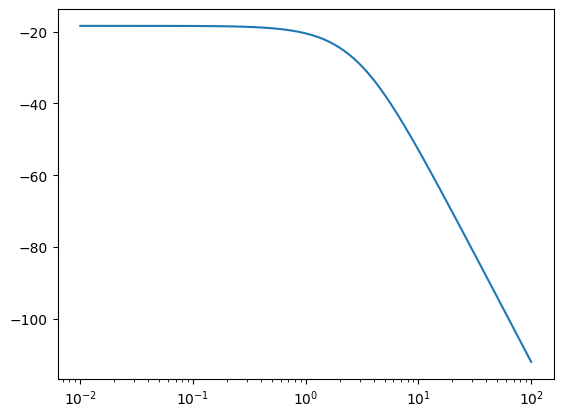

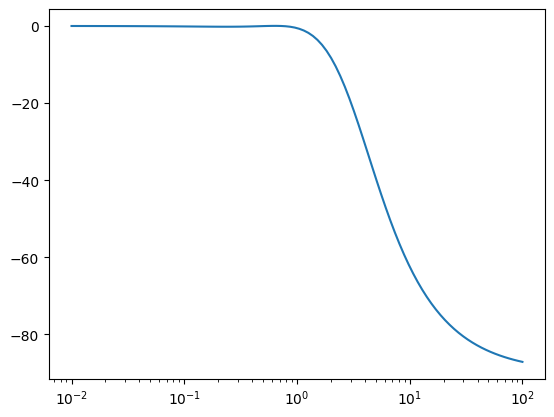

In [ ]:
from scipy import signal
from scipy.signal import ss2tf
import matplotlib.pyplot as plt

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [4, -2, -10/4, -2],
              [-5, -0.4, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

C = np.array([[1, 1, 0, 0]])

D = np.array([[0]])

W = ss2tf(A, B, C, D)

sys = signal.StateSpace(A, B,C,D)
w, mag, phase = signal.bode(sys)


plt.figure()
# plot Bode magnitude
plt.semilogx(w, mag)

plt.figure()
# plot Bode phase
plt.semilogx(w, phase)

plt.show()

Interpretation of the graphs:

The gain decreases at higher frequencies, and the phase starts near 0° and drops below -80° at higher frequencies.

##Task 6:

K: [[-5.00000000e+00  1.10000000e+00 -5.98974756e-15 -5.00000000e-01]]
eigenvalues of A - B*K: [-0.5 -2.  -1.  -1.5]


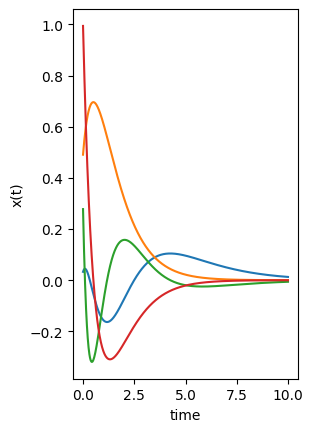

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 4
A = np.array(
    [[0, 0, 1, 0], [0, 0, 0, 1], [4, -2, -10/4, -2], [-5, -0.4, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

#desired eigenvalues
poles = np.array([-0.5, -1, -1.5, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

# x_dot from state space
def StateSpace(x, t):
    return (A-B.dot(K)).dot(x)

time = np.linspace(0, 10, 1000)
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

#test that eigenvalues of the closed loop system are what they are supposed to be
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#plot the solution
plt.subplot(121)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

## Task 7:
### Part1: state dynamics
The new control law is of the following general form:
$-K \cdot (x - x_0) + u ^ {*}$
where $u ^ {*}$ satisfies the equation:
$\dot x_0 = A \cdot x_0 + B \cdot u ^ {*}$

The last equation can be written numerically as follows:
$$\begin{bmatrix}
0 \\
0 \\
0 \\
0
\end{bmatrix}=\begin{bmatrix}
0 && 0 && 1 && 0 &&\\
0 && 0 && 0 && 1 &&\\
4 && -2 && -\frac{10}{4} && -2\\
-5 && -0.4 && 0 && -3
\end{bmatrix} \cdot \begin{bmatrix}
2.4 \\
-1 \\
0 \\
0
\end{bmatrix} + \begin{bmatrix}
0 \\
0 \\
-1 \\
1
\end{bmatrix} \cdot u ^{*}$$
$$\iff$$
$$\begin{bmatrix}
0 \\
0 \\
0 \\
0
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
11.6 \\
-11.6
\end{bmatrix} + \begin{bmatrix}
0 \\
0 \\
-1 \\
1
\end{bmatrix} \cdot u ^{*} \implies u^{*} = 11.6$$
Consequently, we have
$$u =
\begin{bmatrix}
-5 & 1.1 & 0 & -0.5
\end{bmatrix} \cdot
( x -
\begin{bmatrix}
2.4 \\
-1 \\
0 \\
0
\end{bmatrix})
+ 11.6$$

The closed-loop system can now be modeled as follows:
$\dot x = A\cdot x + B \cdot (-K\cdot(x - x_0) + u^{*})
= A\cdot x - B \cdot K (x - x_0) + B \cdot u ^ {*}$
Using the equation:
$A \cdot x_0 + B \cdot u ^ {*} = \dot x_0 = 0$
we obtain, $ B \cdot u ^ {*} = -A \cdot x_0 $. Thus the closed-loop system can be expressed as follows:

$\dot x = (A - B \cdot K) \cdot (x - x_0)$

K: [[-5.00000000e+00  1.10000000e+00 -5.98974756e-15 -5.00000000e-01]]
eigenvalues of A - B*K: [-0.5 -2.  -1.  -1.5]


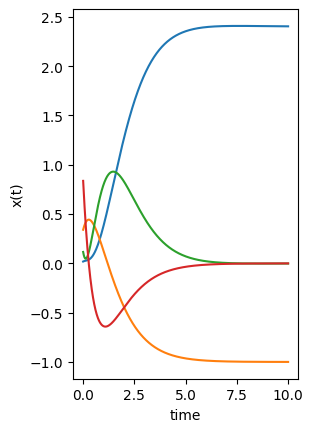

In [ ]:
# THIS IS A STIMULATION OF THE STATE DYNAMICS
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

n = 4
A = np.array(
    [[0, 0, 1, 0], [0, 0, 0, 1], [4, -2, -10/4, -2], [-5, -0.4, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

#desired eigenvalues
poles = np.array([-0.5, -1, -1.5, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

A_stable = A - B.dot(K)
x_0 = np.array([2.4,-1,0,0])

# x_dot from state space
def StateSpace(x, t):
    return A_stable.dot(x) - A_stable.dot(x_0)

time = np.linspace(0, 10, 1000)
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}



#test that eigenvalues of the closed loop system are what they are supposed to be
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#plot the solution
plt.subplot(121)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

#### Part2: error dynamics
Let's denote $x_0(t)$ as $x_0 $. we have the following:
\begin{gather*}
\dot x  = A \cdot x + B \cdot u  \\
\dot x_0  = A \cdot x_0 + B \cdot u_0
\end{gather*}
where the control law $u_0$ can be expressed as $B \cdot ^ + \cdot (\dot x_0 - A\cdot x_0)$

We introduce the error control $e = x - x_0$. Using the system of equation mentioned above, we obtain:
$\dot e = A \cdot e + B \cdot - K \cdot e = (A - B\cdot K) \cdot e$

$\implies \dot e = (A - B\cdot K) \cdot e$

The error dynamics can be simulated using the code below



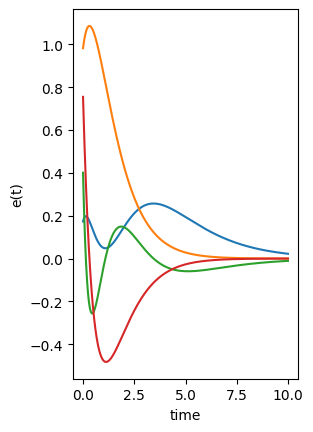

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 4
A = np.array(
    [[0, 0, 1, 0], [0, 0, 0, 1], [4, -2, -10/4, -2], [-5, -0.4, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

#desired eigenvalues
poles = np.array([-0.5, -1, -1.5, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;

# x_dot from state space
def StateSpace(e, t):
    return (A-B.dot(K)).dot(e)

time = np.linspace(0, 10, 1000)
e0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, e0, time)}

#plot the solution
plt.subplot(121)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('e(t)')

plt.show()

## Task 8:
A continous system $\dot x  = A \cdot x + B \cdot u$ can be discretized with period $\Delta t$ as follows:
\begin{gather*}
x_{i + 1} = \bar A \cdot x_i  + \bar B \cdot u_i \\
\bar A = A \cdot \Delta t + I \\
\bar B = B \cdot \Delta t
\end{gather*}
Applying the general formula with $\Delta t$ = 0.01 we obtain the following system:

\begin{gather*}
x_{i + 1} =
\begin{bmatrix}
1 && 0 && 0.01 && 0 \\
0 &&1 &&0 &&0.01&& \\
0.04 && -0.02 && \frac{39}{40} && -0.02 \\
-0.05 && -0.004 && 0 && 0.97
\end{bmatrix}
\cdot
x_i
+
\begin{bmatrix}
0 \\
0 \\
-0.01 \\
0.01
\end{bmatrix}
\cdot
u_i
\end{gather*}



## Task 9:
#### Part 1: Pole placement
For a discrete system to be stable, the eigenvalues of the closed loop system need to be less than $1$ in absolute value. The values chosen are $-0.5, 0.5, 0.25, -0.25$. The code below generates the corresponding gain matrix.

K: [[-6.16032130e+08 -1.40816460e+09 -3.16875342e+08 -3.16874948e+08]]
eigenvalues of A - B*K: [-0.57297059+0.52050455j -0.57297059-0.52050455j  0.5729706 +0.26860945j
  0.5729706 -0.26860945j]


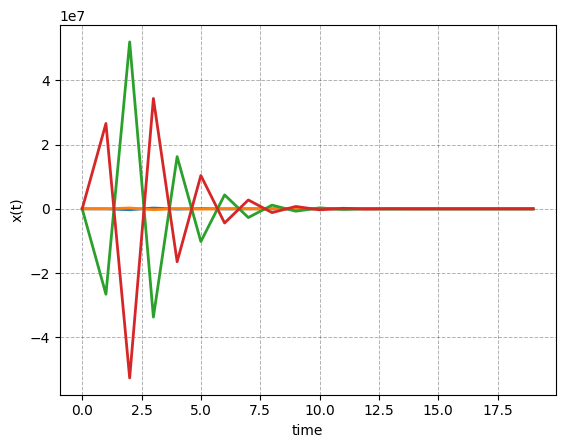

In [ ]:

from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

n = 4
A = np.array([[1, 0, 0.01, 0], [0, 1, 0 , 0.01],
              [0.04, -0.02, 39/40, -0.02], [-0.05, -0.004, 0, 0.97]])
B = np.array([[0], [0], [-0.01], [0.01]])

#desired eigenvalues: chosen to be less than 1 in absolute value
poles = np.array([0.25, -0.25, 0.5, -0.5 ])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

Count = 20
time = np.zeros((Count))
# Delta t
dt = 0.01

x0 = np.array([1,1,1,1])  # initial state
solution = np.zeros((Count, 4))
solution[0, :] = x0

for i in range(0, Count-1):
    x = solution[i, :]
    x = (A - B.dot(K)).dot(x)
    solution[i+1, :] = np.reshape(x, (1, 4))
    time[i] = dt*i

plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)

According to the pole placement technique, one suitable control law is: $$u = \begin{bmatrix}
 -6.16032130e+08  && -1.40816460e+09  && -3.16875342e+08  && -3.16874948e+08
\end{bmatrix} \cdot x$$

#### Part 2: LQR function
Taking into consideration, the dimensions of $x$ and $u$ matrices, matrices $Q$ and $R$ are chosen as the identity matrices $4 * 4$ and $1 * 1$ (Identity matrix is semi definite in all its dimensions) respectively.
Thus the cost function would be $\int x^T x + u^T \cdot u\, dt$

In [ ]:
import scipy
import numpy as np
from scipy.signal import place_poles

def lqr(A,B,Q,R):
  """Solve the continuous time lqr controller.

  dx/dt = A x + B u

  cost = integral x.T*Q*x + u.T*R*u
  """

  #first, try to solve the ricatti equation
  S = np.matrix(scipy.linalg.solve_discrete_are(A, B, Q, R))

  #compute the LQR gain
  K = np.matrix(scipy.linalg.inv(R)*(B.T*S))

  eigVals, eigVecs = scipy.linalg.eig(A-B*K)

  return K, S, eigVals

# the discretization step
T = 0.01

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [4, -2, -10/4, -2],
              [-5, -0.4, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

A_d = np.eye(4) + T * A
B_d = T * B

#
Q = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
R = np.array([[1]])
K, S, Lambda = lqr(A_d,B_d,Q,R)

K = np.array(K)
print(f"K = {K}")

K = [[-8.94578381  2.23508725 -2.2295179   1.45733466]]


### Task 10:
We consider the eigenvalues of the closed-loop after adopting the control law proposed above.

In [ ]:

from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

n = 4
A = np.array([[1, 0, 0.01, 0], [0, 1, 0 , 0.01],
              [0.04, -0.02, 39/40, -0.02], [-0.05, -0.004, 0, 0.97]])
B = np.array([[0], [0], [-0.01], [0.01]])

#desired eigenvalues: chosen to be less than 1 in absolute value
poles = np.array([0.25, -0.25, 0.5, -0.5 ])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;

#test that eigenvalues of the closed loop system are what they are supposed to be
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)


eigenvalues of A - B*K: [-0.57297059+0.52050455j -0.57297059-0.52050455j  0.5729706 +0.26860945j
  0.5729706 -0.26860945j]


According to the code above, the eigenvalues of the closed-loop system (matrix $ A - B\cdot K$) are: $-0.57, -0.57, 0.57, 0.57$. All eigenvalues are less than $1$ in absolute value. Thus, the discrete system is stable. This claim is supported by the simulation

## Task 11:


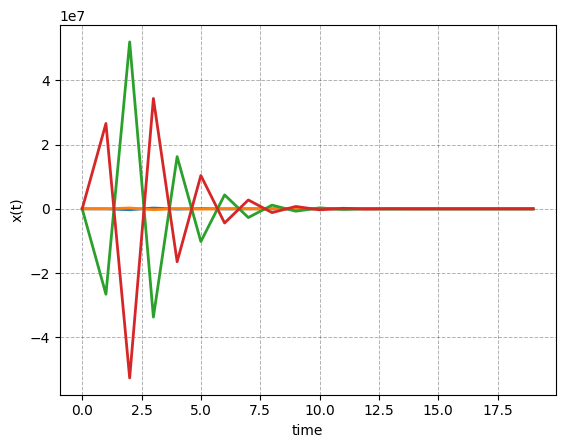

In [ ]:

from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt

n = 4
A = np.array([[1, 0, 0.01, 0], [0, 1, 0 , 0.01],
              [0.04, -0.02, 39/40, -0.02], [-0.05, -0.004, 0, 0.97]])
B = np.array([[0], [0], [-0.01], [0.01]])

#desired eigenvalues: chosen to be less than 1 in absolute value
poles = np.array([0.25, -0.25, 0.5, -0.5 ])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;

Count = 20
time = np.zeros((Count))
# Delta t
dt = 0.01

x0 = np.array([1,1,1,1])  # initial state
solution = np.zeros((Count, 4))
solution[0, :] = x0

for i in range(0, Count-1):
    x = solution[i, :]
    x = (A - B.dot(K)).dot(x)
    solution[i+1, :] = np.reshape(x, (1, 4))
    time[i] = dt*i

plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)